In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as auni

from Gala_dynesty_orbit import *
from Stream_get_data import *
from Stream_fit import *

import scienceplots
plt.style.use('science')
plt.rcParams.update({'font.size': 16})


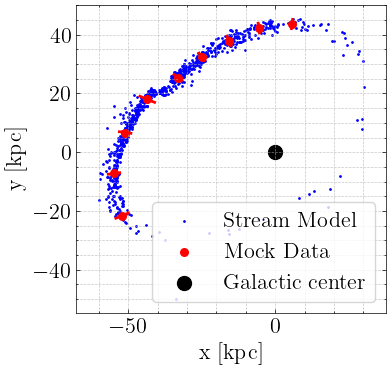

In [28]:
plt.figure(figsize=(4,4))
plt.scatter(xy_stream[:, 0], xy_stream[:, 1], s=1, color='b', label='Stream Model') 
plt.scatter(dict_data['x'], dict_data['y'], s=30, color='r', label='Mock Data')
for i in range(len(dict_data['theta'])):
    xerr = dict_data['r_sig'][i] * np.cos(dict_data['theta'][i])
    yerr = dict_data['r_sig'][i] * np.sin(dict_data['theta'][i])
    plt.plot(np.array([dict_data['x'][i] - xerr, dict_data['x'][i] + xerr]) + x_center, np.array([dict_data['y'][i] - yerr, dict_data['y'][i] + yerr]) + y_center, 'r', linewidth=2)

plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
plt.xlabel('x [kpc]')
plt.ylabel('y [kpc]')
plt.axis('equal')
plt.scatter(0,0, c='k', s=100, label='Galactic center')
plt.legend(loc='lower right', frameon=True)
plt.savefig('DataStream.pdf', bbox_inches='tight')


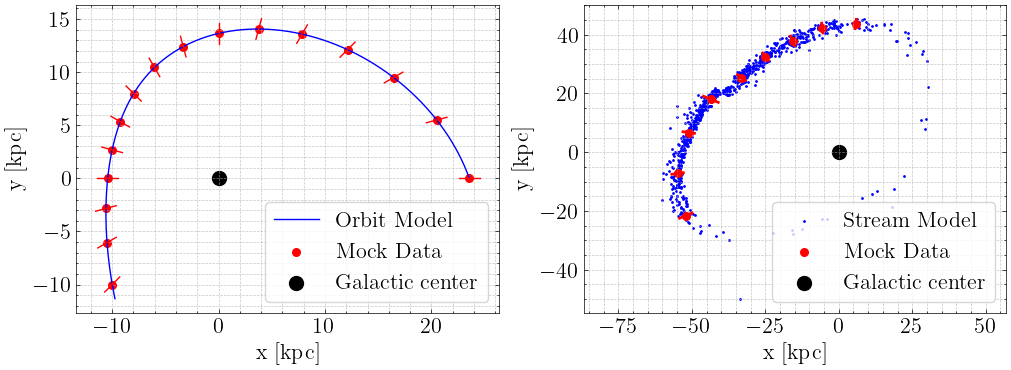

In [29]:
q_true = 0.9
orbit_dict_data, orbit_params_data = get_data(q_true, ndim=12, seed=1, sigma=1, n_ang=24)
x_center, y_center = 0, 0
orbit_xy_model = model(orbit_params_data, n_steps=int(1e3))

plt.figure(figsize=(12, 4))
plt.subplot(1,2,1)
plt.plot(orbit_xy_model[:,0] + x_center, orbit_xy_model[:,1] + y_center, 'b', label='Orbit Model')
plt.scatter(orbit_dict_data['x'], orbit_dict_data['y'], s=30, c='r', label='Mock Data')
for i in range(len(orbit_dict_data['theta'])):
    xerr = orbit_dict_data['r_sig'] * np.cos(orbit_dict_data['theta'][i])
    yerr = orbit_dict_data['r_sig'] * np.sin(orbit_dict_data['theta'][i])
    plt.plot(np.array([orbit_dict_data['x'][i] - xerr, orbit_dict_data['x'][i] + xerr]) + x_center, np.array([orbit_dict_data['y'][i] - yerr, orbit_dict_data['y'][i] + yerr]) + y_center, 'r')
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
plt.xlabel('x [kpc]')
plt.ylabel('y [kpc]')
plt.axis('equal')
plt.scatter(0,0, c='k', s=100, label='Galactic center')
plt.legend(loc='lower right', frameon=True)
plt.subplot(1,2,2)

plt.scatter(xy_stream[:, 0], xy_stream[:, 1], s=1, color='b', label='Stream Model') 
plt.scatter(dict_data['x'], dict_data['y'], s=30, color='r', label='Mock Data')
for i in range(len(dict_data['theta'])):
    xerr = dict_data['r_sig'][i] * np.cos(dict_data['theta'][i])
    yerr = dict_data['r_sig'][i] * np.sin(dict_data['theta'][i])
    plt.plot(np.array([dict_data['x'][i] - xerr, dict_data['x'][i] + xerr]) + x_center, np.array([dict_data['y'][i] - yerr, dict_data['y'][i] + yerr]) + y_center, 'r', linewidth=2)

plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
plt.xlabel('x [kpc]')
plt.ylabel('y [kpc]')
plt.axis('equal')
plt.scatter(0,0, c='k', s=100, label='Galactic center')
plt.legend(loc='lower right', frameon=True)
plt.savefig('DataOrbitStream.pdf', bbox_inches='tight')


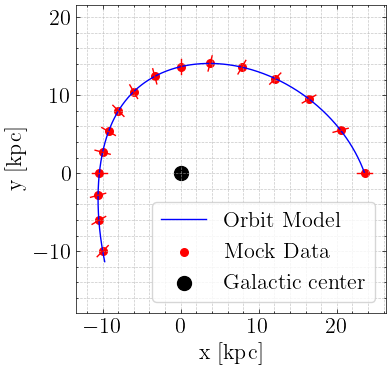

In [30]:
q_true = 0.9
orbit_dict_data, orbit_params_data = get_data(q_true, ndim=12, seed=1, sigma=1, n_ang=24)
x_center, y_center = 0, 0
orbit_xy_model = model(orbit_params_data, n_steps=int(1e3))

plt.figure(figsize=(4, 4))
plt.plot(orbit_xy_model[:,0] + x_center, orbit_xy_model[:,1] + y_center, 'b', label='Orbit Model')
plt.scatter(orbit_dict_data['x'], orbit_dict_data['y'], s=30, c='r', label='Mock Data')
for i in range(len(orbit_dict_data['theta'])):
    xerr = orbit_dict_data['r_sig'] * np.cos(orbit_dict_data['theta'][i])
    yerr = orbit_dict_data['r_sig'] * np.sin(orbit_dict_data['theta'][i])
    plt.plot(np.array([orbit_dict_data['x'][i] - xerr, orbit_dict_data['x'][i] + xerr]) + x_center, np.array([orbit_dict_data['y'][i] - yerr, orbit_dict_data['y'][i] + yerr]) + y_center, 'r')
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
plt.xlabel('x [kpc]')
plt.ylabel('y [kpc]')
plt.axis('equal')
plt.scatter(0,0, c='k', s=100, label='Galactic center')
plt.legend(loc='lower right', frameon=True)
plt.savefig('DataOrbit.pdf', bbox_inches='tight')

Text(0.5, 0, '825')

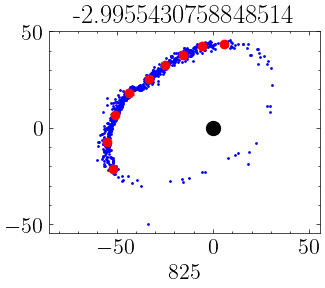

In [19]:
q_true = 0.9
seed   = np.random.randint(1, 1000)
dict_data, params_data = get_data_stream(q_true, sigma=1, seed=seed, n_ang=24, ndim=15)
xy_stream = model_stream(params_data, dt=-10)

x_center, y_center = 0, 0 
plt.scatter(xy_stream[:, 0], xy_stream[:, 1], s=1, color='b', label='Model') 
plt.scatter(dict_data['x'], dict_data['y'], color='r', label='Data')
for i in range(len(dict_data['theta'])):
    xerr = dict_data['r_sig'][i] * np.cos(dict_data['theta'][i])
    yerr = dict_data['r_sig'][i] * np.sin(dict_data['theta'][i])
    plt.plot(np.array([dict_data['x'][i] - xerr, dict_data['x'][i] + xerr]) + x_center, np.array([dict_data['y'][i] - yerr, dict_data['y'][i] + yerr]) + y_center, 'r')
plt.scatter(0,0, color='k', s=100)
plt.axis('equal')
plt.title(log_likelihood_stream(params_data, dict_data))
plt.xlabel(seed)

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from gala.potential import NFWPotential, MiyamotoNagaiPotential, CompositePotential
from astropy import units as auni
units = [auni.kpc, auni.km / auni.s, auni.Msun, auni.Gyr, auni.rad]

# Define a spherical NFW potential
nfw_potential = NFWPotential(
    m=1e12 * auni.Msun,  # Mass of the halo in solar masses
    r_s=15 * auni.kpc,  # Scale radius in kpc
    a=1, 
    b=1, 
    c=1,
    units=units  # Units for distance, velocity, and time
)

# Define a disk potential using Miyamoto-Nagai model
disk_potential = MiyamotoNagaiPotential(
    m=5e10 * auni.Msun,  # Mass of the disk in solar masses
    a=3 * auni.kpc,    # Scale length in kpc
    b=0.5 * auni.kpc,   # Scale height in kpc
    units=units  # Units for distance, velocity, and time
)

# Combine the NFW and disk potential into a composite potential
composite_potential = CompositePotential(
    nfw=nfw_potential,
    disk=disk_potential
)

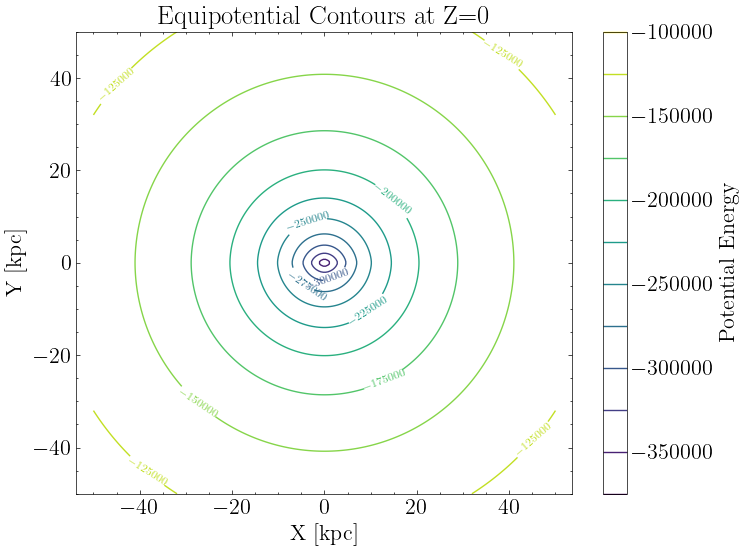

In [17]:
# Create a grid in the X-Y plane at Z=0
x = np.linspace(-50, 50, 200) * auni.kpc
y = np.linspace(-50, 50, 200) * auni.kpc
X, Y = np.meshgrid(x, y)

# Positions need to be a (3, N) array
positions = np.array([X.flatten(), Y.flatten(), np.zeros_like(X.flatten())]) * auni.kpc
positions = np.array([X.flatten(), np.zeros_like(X.flatten()), Y.flatten()]) * auni.kpc

# Compute the potential energy at these positions
phi = composite_potential.energy(positions)

# Reshape phi back to a 2D grid for plotting
phi = phi.reshape(X.shape)

# Plot the equipotential contours
plt.figure(figsize=(8, 6))
contour = plt.contour(X.value, Y.value, phi.value, levels=10)
plt.clabel(contour, inline=True, fontsize=8)
plt.xlabel('X [kpc]')
plt.ylabel('Y [kpc]')
plt.title('Equipotential Contours at Z=0')
plt.axis('equal')
plt.colorbar(label='Potential Energy')
plt.show()

### Figure out how to define logM and logv ###

(0.0, 2.7)

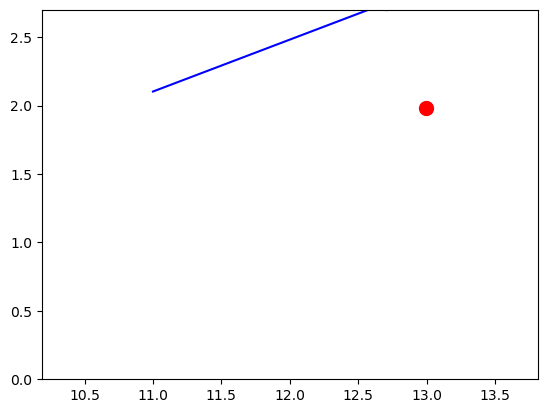

In [110]:
import numpy as np
import matplotlib.pyplot as plt

# Given parameters
a = 0.37941054
b = -2.07151251
logM_min = 11
logM_max = 13
logv_min = 0
logv_max = 2.7

# Calculate unit vectors
norm = np.sqrt(1 + a**2)
u = np.array([1, a]) / norm
v = np.array([-a, 1]) / norm

# Starting point on the line
logM0 = logM_min
logv0 = a * logM0 + b

# Calculate the length of the line segment within permitted ranges
# logM_end = (logv_max - b) / a
# if logM_end > logM_max:
#     logM_end = logM_max

logM_end = logM_max
delta_logM = logM_end - logM0
delta_logv = a * delta_logM

Length = np.sqrt(delta_logM**2 + delta_logv**2)

# Sampling ranges
alpha_min = 0
alpha_max = 1
beta_min = -2
beta_max = 2

# Number of samples

alpha = np.random.uniform(alpha_min, alpha_max)
beta  = np.random.uniform(beta_min, beta_max)

s = alpha * Length
logM = logM0 + s * u[0] + beta * v[0]
logv = logv0 + s * u[1] + beta * v[1]

plt.scatter(logM, logv, c='r', s=100)
plt.scatter(logM0 + s * u[0], logv0 + s * u[1], c='b', s=100)
plt.plot([logM0, logM_end], [logv0, a * logM_end + b], 'b')
plt.axis('equal')
plt.xlim([logM_min, logM_max])
plt.ylim([logv_min, logv_max])
